</p>

<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p></p><div class="list-group" id="list-tab" role="tablist">
  <h2 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home" style = "border:2px solid DarkOrchid;text-align: center; background-color:SlateGray;font-weight: bold; color:white;">Notebook Content</h2>
    
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="profile" target="_self" style = "color:DarkOrchid;font-weight: bold;font-size:16px;">1.Importing Libraries and tables<span class="badge badge-primary badge-pill"></span></a>
    
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages" target="_self" style = "color:DarkOrchid;font-weight: bold;font-size:16px;">2.Renaming some columns <span class="badge badge-primary badge-pill"></span></a>
    
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="settings" target="_self" style = "color:DarkOrchid;font-weight: bold;font-size:16px;">3.Merging <span class="badge badge-primary badge-pill"></span></a>
    
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="settings" target="_self" style = "color:DarkOrchid;font-weight: bold;font-size:16px;">4.Narrowing Dataframe: last 20 years<span class="badge badge-primary badge-pill"></span></a> 
    
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab" aria-controls="settings" target="_self" style = "color:DarkOrchid;font-weight: bold;font-size:16px;">5.First observations and Exploratory Data Analysis<span class="badge badge-primary badge-pill"></span></a>
    
 <a class="list-group-item list-group-item-action" data-toggle="list" href="#6" role="tab" aria-controls="settings" target="_self" style = "color:DarkOrchid;font-weight: bold;font-size:16px;">6.Groupby disease type <span class="badge badge-primary badge-pill"></span></a>
    
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#7" role="tab" aria-controls="settings" target="_self" style = "color:DarkOrchid;font-weight: bold;font-size:16px;">7.Final Look<span class="badge badge-primary badge-pill"></span></a>
</div>
</div>
</div>

<a id = "1"></a>  
<i><h3 style="background-color:White;color:DarkOrchid;"> Importing Libraries and tables</h3> </i>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import plotly.graph_objs as go

In [ ]:
studies = pd.read_csv("../input/studiess/allstudies.csv")
studies.sample(3)

In [ ]:
interventions = pd.read_csv("../input/interventions/interventions.csv")
interventions.sample(3)

In [ ]:
conditions = pd.read_csv("../input/conditions/conditions.csv")
conditions.sample(3)

In [ ]:
browse_conditions = pd.read_csv("../input/browseconditions/browse_conditions.csv")
browse_conditions.sample(3)

In [ ]:
browse_interventions = pd.read_csv("../input/browseinterventions/browse_interventions.csv")
browse_interventions.sample(3)

In [ ]:
countries = pd.read_csv("../input/countries/countries.csv")
countries.sample(3)

In [ ]:
interventions_other_names = pd.read_csv("../input/intervetionothernames/intervention_other_names.csv")
interventions_other_names.sample(3)

In [ ]:
responsible_parties = pd.read_csv("../input/sponsorparty/responsible_parties.csv")
responsible_parties.sample(3)

In [ ]:
sponsors = pd.read_csv("../input/sponsorparty/sponsors.csv")
sponsors.sample(3)

In [ ]:
milestones = pd.read_csv("../input/milestones/milestones.csv")
milestones.sample(3)

<a id = "2"></a>
<i><h3 style="background-color:White;color:DarkOrchid;">  before merge, change some column names in some tables to escape misunderstanding. Such as conditions, sponsor, responsible party, intervention tables have "name" column, renaming them as intervention_name, condition_name, sponsor_name will clarify the values</h3> </i>

In [ ]:
studies.columns
studies_ = studies.copy()

interventions.columns # ['id', 'nct_id', 'intervention_type', 'name', 'description']
interventions_ = interventions.rename(columns={'id': 'id_intervention', 'name': 'name_intervention','description': 'description_intervention'})

conditions.columns # ['id', 'nct_id', 'name', 'downcase_name']
conditions_ = conditions.rename(columns={'id': 'id_conditions', 'name': 'name_condition','downcase_name': 'downcase_name_condition'})

browse_conditions.columns # ['id', 'nct_id', 'mesh_term', 'downcase_mesh_term']
browse_conditions_ = browse_conditions.rename(columns={'id': 'id_browse_conditions', 'mesh_term': 'mesh_term_browse_conditions','downcase_mesh_term': 'downcase_mesh_term_browse_conditions'})

browse_interventions.columns # ['id', 'nct_id', 'mesh_term', 'downcase_mesh_term']
browse_interventions_ = browse_interventions.rename(columns={'id': 'id_browse_intereventions', 'mesh_term': 'mesh_term_browse_interventions','downcase_mesh_term': 'downcase_mesh_term_browse_interventions'})

countries.columns # ['id', 'nct_id', 'name', 'removed']
countries_ = countries.rename(columns={'id': 'id_countries', 'name': 'country_name'})

interventions_other_names.columns # ['id', 'nct_id', 'intervention_id', 'name']
interventions_other_names_ = interventions_other_names.rename(columns={'id': 'id_intervention_other_name', 'intervention_id': 'intervention_id_İnt_Oth_Name','name': 'interevention_other_name'})

responsible_parties.columns # ['id', 'nct_id', 'responsible_party_type', 'name', 'title','organization', 'affiliation']
responsible_parties_ = responsible_parties.rename(columns={'id': 'id_responsible_party', 'name': 'responsible_party_name','title': 'responsible_party_title','organization': 'responsible_party_organization','affiliation': 'responsible_party_affiliation'})

sponsors.columns # ['id', 'nct_id', 'agency_class', 'lead_or_collaborator', 'name']
sponsors_ = sponsors.rename(columns={'id': 'id_sponsors', 'agency_class': 'sponsor_agency_class','lead_or_collaborator': 'sponsor_lead_or_collaborator','name': 'sponsor_name'})


<i><h3 style="background-color:White;color:DarkOrchid;">  dropped duplicated values before merge helps better results. Since method merge will create duplicates itself, to avoid dataframe full of duplicates and takes bigger memory</h3> </i>

In [ ]:
interventions_.duplicated(subset=["nct_id"], keep='first').sum() # 312718 duplicates 
interventions_no_duplicates = interventions_.drop_duplicates(subset=['nct_id'], keep=False)
interventions_no_duplicates.shape # (159496, 5)

conditions_.duplicated(subset=["nct_id"], keep='first').sum() # 268859 duplicates 
conditions_no_duplicates = conditions_.drop_duplicates(subset=['nct_id'], keep=False)
conditions_no_duplicates.shape # (257627, 4)

browse_conditions_.duplicated(subset=["nct_id"], keep='first').sum() # 329883 
browse_conditions_no_duplicates = browse_conditions_.drop_duplicates(subset=['nct_id'], keep=False)
browse_conditions_no_duplicates.shape # (143104, 4)

browse_interventions_.duplicated(subset=["nct_id"], keep='first').sum() # 126300 duplicates 
browse_interventions_no_duplicates = browse_interventions_.drop_duplicates(subset=['nct_id'], keep=False)
browse_interventions_no_duplicates.shape # (74467, 4)

countries_.duplicated(subset=["nct_id"], keep='first').sum() # 126300 duplicates 
countries_no_duplicates = countries_.drop_duplicates(subset=['nct_id'], keep=False)
countries_no_duplicates.shape # (310944, 4)

interventions_other_names_.duplicated(subset=["nct_id"], keep='first').sum() # 126300 duplicates 
interventions_other_names__no_duplicates = interventions_other_names_.drop_duplicates(subset=['nct_id'], keep=False)
interventions_other_names__no_duplicates.shape # (51903, 4)

responsible_parties_.duplicated(subset=["nct_id"], keep='first').sum() # 126300 duplicates 
responsible_parties_no_duplicates = responsible_parties_.drop_duplicates(subset=['nct_id'], keep=False)
responsible_parties_no_duplicates.shape # (364900, 7)

sponsors_.duplicated(subset=["nct_id"], keep='first').sum() # 126300 duplicates 
sponsors_no_duplicates = sponsors_.drop_duplicates(subset=['nct_id'], keep=False)
sponsors_no_duplicates.shape # (255921, 5)

<a id = "3"></a>
<i><h3 style="background-color:White;color:DarkOrchid;"> All tables has nct_id common column, therefore with "inner join" common nct_id's can merge, with "left join" columns exist in the left table and common nct_id's at both table can merge, or with outer join all nct_id's at both table exist at one table.
    Another way to merge is to concat tables, this method concates using append. Appends the common rows or columns, creates NaN values for unmatched values.</h3> </i>

for more detailed info for how merged [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

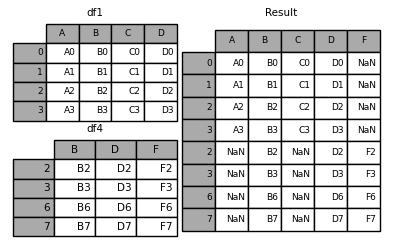

In [ ]:
studies_AND_interventions = pd.merge(studies_, interventions_, on="nct_id")
studies_AND_interventions.shape # (159496, 68)

In [ ]:
studies_AND_interventions_AND_conditions = pd.merge(studies_AND_interventions, conditions_, on="nct_id")
studies_AND_interventions_AND_conditions.shape

In [ ]:
studies_AND_interventions_AND_conditions_AND_browCon = pd.merge(studies_AND_interventions_AND_conditions, browse_conditions_no_duplicates, on="nct_id")
studies_AND_interventions_AND_conditions_AND_browCon.shape

In [ ]:
studies_AND_interventions_AND_conditions_AND_browCon_AND_browİnt = pd.merge(studies_AND_interventions_AND_conditions_AND_browCon, browse_interventions_, on="nct_id")
studies_AND_interventions_AND_conditions_AND_browCon_AND_browİnt.shape

In [ ]:
studies_AND_interventions_AND_conditions_AND_browCon_AND_browİnt_AND_respon_party = pd.merge(studies_AND_interventions_AND_conditions_AND_browCon_AND_browİnt, responsible_parties_, on="nct_id")
studies_AND_interventions_AND_conditions_AND_browCon_AND_browİnt_AND_respon_party.shape

In [ ]:
studies_AND_interventions_AND_conditions_AND_browCon_AND_browİnt_AND_respon_party_AND_sponsor = pd.merge(studies_AND_interventions_AND_conditions_AND_browCon_AND_browİnt_AND_respon_party, sponsors_, on="nct_id")
studies_AND_interventions_AND_conditions_AND_browCon_AND_browİnt_AND_respon_party_AND_sponsor.shape

In [ ]:
studies_AND_interventions_AND_conditions_AND_browCon_AND_browİnt_AND_respon_party_AND_sponsor_AND_country = pd.merge(studies_AND_interventions_AND_conditions_AND_browCon_AND_browİnt_AND_respon_party_AND_sponsor, countries_no_duplicates, on="nct_id")
studies_AND_interventions_AND_conditions_AND_browCon_AND_browİnt_AND_respon_party_AND_sponsor_AND_country.shape

In [ ]:
# studies_AND_interventions_AND_conditions_AND_browCon_AND_browİnt_AND_respon_party_AND_sponsor_AND_country_AND_intOthName = pd.merge(studies_AND_interventions_AND_conditions_AND_browCon_AND_browİnt_AND_respon_party_AND_sponsor_AND_country, interventions_other_names_, on="nct_id")
# studies_AND_interventions_AND_conditions_AND_browCon_AND_browİnt_AND_respon_party_AND_sponsor_AND_country_AND_intOthName.shape

In [ ]:
df = studies_AND_interventions_AND_conditions_AND_browCon_AND_browİnt_AND_respon_party_AND_sponsor_AND_country.copy()

In [ ]:
df.shape

In [ ]:
df.sample(3)

<i><h3 style="background-color:White;color:DarkOrchid;"> Number of empty values </h3> </i>

In [ ]:
df.isnull().sum()

<a id = "4"></a>
<i><h3 style="background-color:White;color:DarkOrchid;"> Separating data as unfinished studies and finished. Saving unfinished studies for later model evaluation </h3> </i> 

In [ ]:
df['completion_date'].isnull().sum() # number of null values in completion time

In [ ]:
df.loc[df["completion_date"].isna() == True].sample(3)

In [ ]:
df['completion_date'] = pd.to_datetime(df['completion_date'])
unfinished_trials = df.loc[(df['completion_date'] >= 'August 1 2021')]
finished_trials = df.loc[(df['completion_date'] < 'August 1 2021')]

# null values in comletion date did not exists in finished and unfisnished trials

unfinished_trials.shape # (183336, 90)
finished_trials.shape # (317713, 90)

unfinished_trials['completion_date'].isnull().sum() #0
finished_trials['completion_date'].isnull().sum() #0

min(finished_trials["completion_date"]) # Timestamp('1988-07-31 00:00:00'), first observation goes too old
max(finished_trials["completion_date"]) # Timestamp('2021-07-31 00:00:00')

trials_2000_2021 = finished_trials.loc[(finished_trials['completion_date'] >= 'January 01 2000')
                     & (finished_trials['completion_date'] < 'August 1 2021')]

min(trials_2000_2021["completion_date"]) # Timestamp('2000-01-31 00:00:00')
max(trials_2000_2021["completion_date"]) # Timestamp('2021-07-31 00:00:00')

In [ ]:
trials_2000_2021.shape

<a id = "5"></a>
<i><h3 style="background-color:White;color:DarkOrchid;"> First Observations </h3> </i>

<i><h4 style="background-color:White;color:SkyBlue;"> How many studies completed over years? Do number of studies grow over time or are there any drowbacks? </h4> </i>

In [ ]:
fig = go.Figure(go.Bar(
    x= trials_2000_2021.groupby(pd.DatetimeIndex(trials_2000_2021['completion_date']).year).agg('count')["nct_id"].sort_values(ascending=False).index,
    y= trials_2000_2021.groupby(pd.DatetimeIndex(trials_2000_2021['completion_date']).year).agg('count')["nct_id"].sort_values(ascending=False).values, 
    textposition='outside' ))
fig.update_layout(title='Studies Per Year')
fig.show()

<i><h4 style="background-color:White;color:SkyBlue;"> What phases are the most studied? Some trials study more than one phase at a time, such as phase2 and phase3 together, this probably decrease the cost.</h4></i>

In [ ]:
labels = trials_2000_2021['phase'].value_counts().index
values = trials_2000_2021['phase'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label',
                             insidetextorientation='radial')])
fig.show()

<i><h4 style="background-color:White;color:SkyBlue;"> Do most of the studies completed or failed? Are there other status types or just recruitments status exists?</h4></i>

In [ ]:
from plotly import __version__
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
trials_2000_2021['overall_status'].value_counts().sort_values(ascending=True).iplot(kind='barh',xTitle='Count',color='green')

<i><h4 style="background-color:White;color:SkyBlue;"> Interventional studies or observational? which one is more common?</h4></i>

In [ ]:
labels = trials_2000_2021['study_type'].value_counts().index
values = trials_2000_2021['study_type'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial')])
fig.show()

<i><h4 style="background-color:White;color:SkyBlue;"> Its hard to conduct trials with more people(higher enrollment number), since the costs will be higher, requires more people to keep records/check results... Lets see the distrubution of studies regarding number of enrollment</h4></i>

In [ ]:
interventional_studies = trials_2000_2021[trials_2000_2021['study_type']=='Interventional']
# Convert to numeric
## interventional_studies['enrollment'] = interventional_studies['enrollment'].astype(int)
# Remove the trials with recruitment status withdrawn and terminated
enrollment = interventional_studies.loc[
 (interventional_studies['overall_status'] != 'Withdrawn') & (interventional_studies['overall_status'] != 'Terminated')]
bins = [-1, 20, 40, 60, 100, 200, 400, 600, 1000]
group_names = ['< 20', '21-40', '41-60', '61-100', '101-200', '201-400', '401-600', '>600']
categories = pd.cut(enrollment['enrollment'], bins, labels=group_names)
# Add categories as column in dataframe
enrollment['Category'] = categories
# View value counts
enrollment_counts = enrollment['Category'].value_counts().sort_index(ascending=True)
enrollment_counts.iplot(kind='bar', title='Size of Interventional Trials',  colors='LightBlue')

<i><h4 style="background-color:White;color:SkyBlue;"> Most Studied Intervention types</h4></i>

In [ ]:
labels = trials_2000_2021['intervention_type'].value_counts().index
values = trials_2000_2021['intervention_type'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label',
                             insidetextorientation='radial')])
fig.show()

<i><h4 style="background-color:White;color:SkyBlue;"> What are the top 10 studied interventions?</h4></i>

In [ ]:
interventional_studies = trials_2000_2021[trials_2000_2021['study_type']=='Interventional']
top_interventions = interventional_studies['name_intervention'].value_counts().sort_values(ascending=True)[-10:]
top_interventions.iplot(kind='barh', title='Interventions',color='pink')

<i><h4 style="background-color:White;color:SkyBlue;"> What organisations conduct trials the most?</h4></i>

In [ ]:
top_interventions = trials_2000_2021['source'].value_counts().sort_values(ascending=True)[-15:]
top_interventions.iplot(kind='barh', title='Organisations ',color='blue')

<i><h4 style="background-color:White;color:SkyBlue;"> Top 10 studied diseases? </h4></i>

In [ ]:
top_conditions = trials_2000_2021['name_condition'].value_counts().sort_values(ascending=True)[-10:]
top_conditions.iplot(kind='barh', title='Most Studied Conditions ',color='purple')

<i><h4 style="background-color:White;color:SkyBlue;"> What are the top 10 countries conducting interventional trials?</h4></i>

In [ ]:
countries = interventional_studies[interventional_studies['country_name']!='']
country = countries['country_name'].value_counts().sort_values(ascending=True)[-10:]
country.iplot(kind='barh', title='Country')

<i><h4 style="background-color:White;color:SkyBlue;"> Sponsors or principal investigators execute more trials?</h4></i>

In [ ]:
labels = trials_2000_2021['responsible_party_type'].value_counts().index
values = trials_2000_2021['responsible_party_type'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label',
                             insidetextorientation='radial')])
fig.show()

<i><h4 style="background-color:White;color:SkyBlue;"> Which conditions require to study biomarker analysis more? </h4></i>

In [ ]:
biomarker_trials = trials_2000_2021[trials_2000_2021["name_intervention"].str.contains("biomarker") | trials_2000_2021["name_intervention"].str.contains("Biomarker")]
biomarker_disease = biomarker_trials['name_condition'].value_counts().sort_values(ascending=True)[-15:]
biomarker_disease.iplot(kind='barh', title='Interventions',color='red')

<i><h4 style="background-color:White;color:SkyBlue;"> How studies funded? </h4></i>

In [ ]:
sponsor_class = trials_2000_2021['sponsor_agency_class'].value_counts().sort_values(ascending=True)[-15:]
sponsor_class.iplot(kind='barh', title='Sponsor Classes',color='lightpink')

In [ ]:
others = trials_2000_2021[trials_2000_2021["sponsor_agency_class"].str.contains("other") | trials_2000_2021["sponsor_agency_class"].str.contains("Other")]
who_others= others['sponsor_name'].value_counts().sort_values(ascending=True)[-10:]
who_others.iplot(kind='barh', title='Who are the Others that fund the trials?',color='lightpurple')

<i><h4 style="background-color:White;color:SkyBlue;"> Responsible parties/positions of studies </h4></i>

In [ ]:
party_title = trials_2000_2021['responsible_party_title'].value_counts().sort_values(ascending=True)[-15:]
party_title.iplot(kind='barh', title='',color='lightgreen')

<i><h4 style="background-color:White;color:SkyBlue;"> What are the top 15 reasons that studies stop or intervene to their development? </h4></i>

In [ ]:
party_title = trials_2000_2021['why_stopped'].value_counts().sort_values(ascending=True)[-15:]
party_title.iplot(kind='barh', title='',color='grey')

In [ ]:
# trials_2000_2021[trials_2000_2021["why_stopped"].str.contains(blood_lymph_keywords, case = False)

<i><h3 style="background-color:White;color:DarkOrchid;"> Saving output file as csv </h3> </i>

In [ ]:
trials_2000_2021.to_csv("trials_2000_2021.csv")

<i><h3 style="background-color:White;color:DarkOrchid;"> Exploratory Data Analysis  </h3> </i>

In [ ]:
trials_2000_2021.shape

In [ ]:
trials_2000_2021.isnull().sum()

In [ ]:
trials_2000_2021.describe() # id columns have the personal info about trials, therefore do not have meaningful information for model and success/failure rates

In [ ]:
trials_2000_2021.sample(3)

<i><h4 style="background-color:White;color:MediumAquaMarine;"> drop some columns, such as id's, some dates(since last 20 years trials determined before, only date variable for future usage will be study start and completion date, dropped qc_dates(quality control dates and varification dates)) </h4></i>

In [ ]:
trials_2000_2021.columns

In [ ]:
some_cols = ['nct_id', 'start_date','study_first_submitted_date',  'study_first_submitted_qc_date','completion_date', 'study_type', 'acronym', 'brief_title', 'official_title',
       'overall_status', 'phase', 'enrollment',
       'enrollment_type', 'source', 'number_of_arms', 'number_of_groups', 'why_stopped', 'intervention_type',
       'name_intervention', 'description_intervention', 
       'name_condition', 'downcase_name_condition', 
       'mesh_term_browse_conditions', 'downcase_mesh_term_browse_conditions',
        'mesh_term_browse_interventions',
       'downcase_mesh_term_browse_interventions', 
       'responsible_party_type', 'responsible_party_name',
       'responsible_party_title', 'responsible_party_organization',
       'responsible_party_affiliation', 'sponsor_agency_class',
       'sponsor_lead_or_collaborator', 'sponsor_name',
       'country_name']

In [ ]:
data = trials_2000_2021[some_cols]

In [ ]:
data.sample(3)

In [ ]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

In [ ]:
missing_values_table(data, na_name=False) # in "number of groups" and "responsible party organisation", higher than %90 values are empty.

<a id = "6"></a>
<i><h3 style="background-color:White;color:DarkOrchid;"> Groupby disease type </h3> </i>

<i><h4 style="background-color:White;color:MediumAquaMarine;"> Oncology trials </h4></i>

In [ ]:
oncology_keywords = r'\bCancer|myelodysplastic|pharyngioma|blastoma|rhabdomyosarcoma|sarcoma|leukaemia|lymphoma|glioma|chordoma|carcinoma|astrocytomas|Melanoma|cancer|neolpla|tumour|tumor|oncology|malignancy\b'

oncology_data = data[data["name_condition"].str.contains(oncology_keywords, case = False)
                             | data["official_title"].str.contains(oncology_keywords, case = False)
                             | data["downcase_mesh_term_browse_conditions"].str.contains(oncology_keywords, case = False)
                             | data["brief_title"].str.contains(oncology_keywords, case = False)]

oncology_data.shape 

oncology_excluded = data[~data.nct_id.isin(oncology_data.nct_id)] # while groupping other conditions excluding oncology

oncology_excluded.shape 

<i><h4 style="background-color:White;color:MediumAquaMarine;"> Mental and Behavioral disorders </h4></i>

In [ ]:
behavioral_keywords = r'\bPsychotic|schizophrenia|bipolar|Mental|Aggression|Agnosia|phobia|Amnesia|Anorexia|blumia|Psyc|Mind|Behavioural|Behavio|Adjustment\b'

behavioral_data = oncology_excluded[oncology_excluded["name_condition"].str.contains(behavioral_keywords, case = False)
                             | oncology_excluded["official_title"].str.contains(behavioral_keywords, case = False)
                             | oncology_excluded["downcase_mesh_term_browse_conditions"].str.contains(behavioral_keywords, case = False)
                             | oncology_excluded["brief_title"].str.contains(behavioral_keywords, case = False)]

behavioral_data.shape 

behavioral_excluded = oncology_excluded[~oncology_excluded.nct_id.isin(behavioral_data.nct_id)] 

<i><h4 style="background-color:White;color:MediumAquaMarine;"> Blood and Lymph Conditions </h4></i>

In [ ]:
blood_lymph_keywords = r'\bAnemia|Cardiovascular|hematologic|stoke|node|heart|tension|sickle cell|Burkitt|lymphoma|Gaucher|Hemophilia|Leukemia|myeloid|Niemann-Pick|hemoglobinuria|Behavioural|Porphyria|Thalassemia\b'

blood_lymph_data = behavioral_excluded[behavioral_excluded["name_condition"].str.contains(blood_lymph_keywords, case = False)
                             | behavioral_excluded["official_title"].str.contains(blood_lymph_keywords, case = False)
                             | behavioral_excluded["downcase_mesh_term_browse_conditions"].str.contains(blood_lymph_keywords, case = False)
                             | behavioral_excluded["brief_title"].str.contains(blood_lymph_keywords, case = False)]

blood_lymph_data.shape 

blood_lymph_excluded = behavioral_excluded[~behavioral_excluded.nct_id.isin(blood_lymph_data.nct_id)] 

<i><h4 style="background-color:White;color:MediumAquaMarine;"> Digestive System Diseases </h4></i>

In [ ]:
digestive_keywords = r'\bReflu|Gastro|Atresia|Biliary|Fistula|Anus|Anorectal|Anisakiasis|Colon|Crohn|Digestive|Diverti|Esophage|Duode|Gastri\b'

digestive_data = blood_lymph_excluded[blood_lymph_excluded["name_condition"].str.contains(digestive_keywords, case = False)
                             | blood_lymph_excluded["official_title"].str.contains(digestive_keywords, case = False)
                             | blood_lymph_excluded["downcase_mesh_term_browse_conditions"].str.contains(digestive_keywords, case = False)
                             | blood_lymph_excluded["brief_title"].str.contains(digestive_keywords, case = False)]

digestive_data.shape 

digestive_excluded = blood_lymph_excluded[~blood_lymph_excluded.nct_id.isin(digestive_data.nct_id)] 

<i><h4 style="background-color:White;color:MediumAquaMarine;"> Respiratory Tract (Lung and Bronchial) Diseases </h4></i>

In [ ]:
respiratory_keywords = r'\bRespir|pulmo|Trache|lung|bronc|Breath|Nasal|Nasopharyn|Nose|respiratory|Anus|Airway|Aphonia|Apnea|Asbestosis|Asthma|bronch|Laryng|Medias|Cough|Cold|Cystic Fibrosis|Sinusitis|Pneumonia|Influenza\b'

respiratory_data = digestive_excluded[digestive_excluded["name_condition"].str.contains(respiratory_keywords, case = False)
                             | digestive_excluded["official_title"].str.contains(respiratory_keywords, case = False)
                             | digestive_excluded["downcase_mesh_term_browse_conditions"].str.contains(respiratory_keywords, case = False)
                             | digestive_excluded["brief_title"].str.contains(respiratory_keywords, case = False)]

respiratory_data.shape 

respiratory_excluded = digestive_excluded[~digestive_excluded.nct_id.isin(respiratory_data.nct_id)] 

<i><h4 style="background-color:White;color:MediumAquaMarine;"> Nervous System Diseases </h4></i>

In [ ]:
nervous_keywords = r'\bnerve|cognitive|sleep|spinal|tremor|Olfacto|Oculomo|Optic|Glioma|Peripheral|Prader-Willi|Reflex|Myelitis|Encephalo|Epilepsy|Fragile X|Lewy|Meningitis|Migraine|sensory|Huntington|cephaly|Ganglio|Gait|Glossopha|Headac|Hematoma|Parkins|Dementia|myelin|Down|Dyslexia|Ageusia|Agnosia|Neuropathy|Neuro|Alzheime|Amaurosis|ograde|Sclerosis|Dysreflexia|Neuri|Brain|Brown|Carotid|Catalep|Cauda|Cavernous|Central|Cerebell|Cerebr|Palsy|Charcot-Marie|Charles Bonnet|Conscious|Cran|Cubital|Delirium|Coma\b'
nervous_data = respiratory_excluded[respiratory_excluded["name_condition"].str.contains(nervous_keywords, case = False)
                             | respiratory_excluded["official_title"].str.contains(nervous_keywords, case = False)
                             | respiratory_excluded["downcase_mesh_term_browse_conditions"].str.contains(nervous_keywords, case = False)
                             | respiratory_excluded["brief_title"].str.contains(nervous_keywords, case = False)]

nervous_data.shape 

nervous_excluded = respiratory_excluded[~respiratory_excluded.nct_id.isin(nervous_data.nct_id)] 

<i><h4 style="background-color:White;color:MediumAquaMarine;">Bacterial and Fungal Diseases</h4></i>

In [ ]:
infectious_keywords = r'\byersinia|tuberculo|Vaginosis|Pedis|tetanu|coccal|Spondylitis|transmitted|Staphy|Plague|philis|Mycobact|mycosis|Lyme|Leprosy|infect|Impetigo|Pneumonia|Helicobacter|Gram|Gonorrhea|Inclusion|mycosis|Cholera|fungal|Carbuncle|Candidi|Candidemia|bacter|Abscess|Infections\b'

infectious_data = nervous_excluded[nervous_excluded["name_condition"].str.contains(infectious_keywords, case = False)
                             | nervous_excluded["official_title"].str.contains(infectious_keywords, case = False)
                             | nervous_excluded["downcase_mesh_term_browse_conditions"].str.contains(infectious_keywords, case = False)
                             | nervous_excluded["brief_title"].str.contains(infectious_keywords, case = False)]

infectious_data.shape # (16989, 35)

infectious_excluded = nervous_excluded[~nervous_excluded.nct_id.isin(infectious_data.nct_id)] 

<i><h4 style="background-color:White;color:MediumAquaMarine;"> Nutritional and Metabolic Diseases </h4></i>

In [ ]:
metabolic_keywords = r'\bstarvation|water|deficiency|Calcification|Thiamine|Tay-Sachs|Protein|Obesity|Mucolipid|Malnutrition|lipo|Lipid|Intolerance|Keto|cemia|Glyco|Galacto|Fructose|Folic|Fabry|Diabet|Mellitus|mycosis|Diabetes|inhibit|Nutruti|Celiac|Calciu|Calcinosis|Beriberi|vitamin|acid|Amino|Alkalosis|albin|albinism|renal|Lactic|Acidosis|Metabol|Nutritional\b'
metabolic_data = infectious_excluded[infectious_excluded["name_condition"].str.contains(metabolic_keywords, case = False)
                             | infectious_excluded["official_title"].str.contains(metabolic_keywords, case = False)
                             | infectious_excluded["downcase_mesh_term_browse_conditions"].str.contains(metabolic_keywords, case = False)
                             | infectious_excluded["brief_title"].str.contains(metabolic_keywords, case = False)]

metabolic_data.shape 

metabolic_excluded = infectious_excluded[~infectious_excluded.nct_id.isin(metabolic_data.nct_id)] 

<i><h4 style="background-color:White;color:MediumAquaMarine;"> Parasitic Diseases </h4></i>

In [ ]:
parasitic_keywords = r'\bLoiasis|Mansonelliasis|Cocc|Cocci|Ascari|Acanth|Echinococ|Filariasis|worm|Lice|Malaria|Parasi|Protozoa|Schistoso|Toxoplas|Trich|Trypan|Zoo\b'

parasitic_data = metabolic_excluded[metabolic_excluded["name_condition"].str.contains(parasitic_keywords, case = False)
                             | metabolic_excluded["official_title"].str.contains(parasitic_keywords, case = False)
                             | metabolic_excluded["downcase_mesh_term_browse_conditions"].str.contains(parasitic_keywords, case = False)
                             | metabolic_excluded["brief_title"].str.contains(parasitic_keywords, case = False)]

parasitic_data.shape 

parasitic_excluded = metabolic_excluded[~metabolic_excluded.nct_id.isin(parasitic_data.nct_id)] 

<i><h4 style="background-color:White;color:MediumAquaMarine;"> Urinary Tract, Sexual Organs, and Pregnancy Conditions   </h4></i>

In [ ]:
sexual_keywords = r'\bAbortion|Pregnancy|male|Pelvic|Ovar|Nephro|Nephri|rrhagia|Leydig|Klinefelt|Kidney|Infertility|Hereditary|Gonorrhea|Genital|sex|Placentae|Adenomyosis|Adnexal|Adrenal|Albuminuria|Anuria|sperm|Cervix|urin|Cystitis|XY|XX|Embryo|Endomet|Erectile|Fallop\b'

sexual_data = parasitic_excluded[parasitic_excluded["name_condition"].str.contains(sexual_keywords, case = False)
                             | parasitic_excluded["official_title"].str.contains(sexual_keywords, case = False)
                             | parasitic_excluded["downcase_mesh_term_browse_conditions"].str.contains(sexual_keywords, case = False)
                             | parasitic_excluded["brief_title"].str.contains(sexual_keywords, case = False)]

sexual_data.shape 

sexual_excluded = parasitic_excluded[~parasitic_excluded.nct_id.isin(sexual_data.nct_id)] 

<i><h4 style="background-color:White;color:MediumAquaMarine;">Viral Diseases  </h4></i>

In [ ]:
viral_keywords = r'\bKeratiti|covid|Measles|RNA Vi|Viremia|Stomati|Smallpox|myelitis|pox|Lenti|Lassa|Influenza|HTLV|HIV|Herpangina|Hepatitis|Simplex|Herpes|DNA vi|Cytomegalo|Dengue|Corona|Chickenpox|Alphavirus|AIDS|viral|virus|Adeno\b'

viral_data = sexual_excluded[sexual_excluded["name_condition"].str.contains(viral_keywords, case = False)
                             | sexual_excluded["official_title"].str.contains(viral_keywords, case = False)
                             | sexual_excluded["downcase_mesh_term_browse_conditions"].str.contains(viral_keywords, case = False)
                             | sexual_excluded["brief_title"].str.contains(viral_keywords, case = False)]

viral_data.shape 

viral_excluded = sexual_excluded[~sexual_excluded.nct_id.isin(viral_data.nct_id)] 

<i><h4 style="background-color:White;color:MediumAquaMarine;">Wounds and Injuries</h4></i>  

In [ ]:
wounds_keywords = r'\bFracture|Elbow|Stress|Foreign-Body|Cubital|Leak|Carpal|toxicity|Electric|Chemical|Burns|Diffuse|Traumatic|Stings|Bite|trauma|Lesion|Rupture|Ankle|Injuries\b'

wounds_data = viral_excluded[viral_excluded["name_condition"].str.contains(wounds_keywords, case = False)
                             | viral_excluded["official_title"].str.contains(wounds_keywords, case = False)
                             | viral_excluded["downcase_mesh_term_browse_conditions"].str.contains(wounds_keywords, case = False)
                             | viral_excluded["brief_title"].str.contains(wounds_keywords, case = False)]

wounds_data.shape 

wounds_excluded = viral_excluded[~viral_excluded.nct_id.isin(wounds_data.nct_id)] 

<i><h4 style="background-color:White;color:MediumAquaMarine;"> Immune System Diseases </h4></i> 

In [ ]:
immune_keywords = r'\bLeukemia|T-Cell|Lymphoma|Lupus|Immuno|Addison|bulinemia|Anaphylaxis|Angioedema|Arthriti|Autoimmune|immune|Lymphoma|Chediak|Allergic|Dermatitis|Diabetes Mellitus,Type 1|Hypersensitivity|Graft|host|Graves|Hodgkin\b'

immune_data = wounds_excluded[wounds_excluded["name_condition"].str.contains(immune_keywords, case = False)
                             | wounds_excluded["official_title"].str.contains(immune_keywords, case = False)
                             | wounds_excluded["downcase_mesh_term_browse_conditions"].str.contains(immune_keywords, case = False)
                             | wounds_excluded["brief_title"].str.contains(immune_keywords, case = False)]

immune_data.shape

immune_excluded = wounds_excluded[~wounds_excluded.nct_id.isin(immune_data.nct_id)] 

<i><h4 style="background-color:White;color:MediumAquaMarine;"> Diseases and Abnormalities at or Before Birth </h4></i>  

In [ ]:
birth_keywords = r'\b22q11|autism|Klinefelter|cephaly|Marfan|Long QT|Abnormali|Anemia|Aniridia|Anophthalmos|Cleft|Colic|Congenital|Craniofacial|Deformities|development|Down|Dwarfism|Ebstein|Factor|Deficiency|Familial|Hyperlipop\b'

birth_data = immune_excluded[immune_excluded["name_condition"].str.contains(birth_keywords, case = False)
                             | immune_excluded["official_title"].str.contains(birth_keywords, case = False)
                             | immune_excluded["downcase_mesh_term_browse_conditions"].str.contains(birth_keywords, case = False)
                             | immune_excluded["brief_title"].str.contains(birth_keywords, case = False)]

birth_data.shape 

birth_excluded = immune_excluded[~immune_excluded.nct_id.isin(birth_data.nct_id)] 

<i><h4 style="background-color:White;color:MediumAquaMarine;"> Disorders of Environmental Origin  </h4></i>  

In [ ]:
environmental_keywords = r'\bDisorders of Environmental Origin|Environmental|Environme|Multiple Chemical Sensitivity\b'

environmental_data = birth_excluded[birth_excluded["name_condition"].str.contains(environmental_keywords, case = False)
                             | birth_excluded["official_title"].str.contains(environmental_keywords, case = False)
                             | birth_excluded["downcase_mesh_term_browse_conditions"].str.contains(environmental_keywords, case = False)
                             | birth_excluded["brief_title"].str.contains(environmental_keywords, case = False)]

environmental_data.shape 

environmental_excluded = birth_excluded[~birth_excluded.nct_id.isin(environmental_data.nct_id)] 

<i><h4 style="background-color:White;color:MediumAquaMarine;">  Ear, Nose, and Throat Diseases   </h4></i> 

In [ ]:
ear_nose_throat_keywords = r'\bVestibu|Voice|Vocal|Tonsil|Sinus|Rhinitis|Pharyn|Otomycosis|Otitis|Nose|Acoustic|Nasal|Mastoiditis|Laryngi|Labyrin|Oticus|Hear|Sinusitis|Epistaxis|deaf|Croup|Cochlear|Ciliary|Ear|Atresia|Vertigo|Auditory|Aphonia\b'

ear_nose_throat_data = environmental_excluded[environmental_excluded["name_condition"].str.contains(ear_nose_throat_keywords, case = False)
                             | environmental_excluded["official_title"].str.contains(ear_nose_throat_keywords, case = False)
                             | environmental_excluded["downcase_mesh_term_browse_conditions"].str.contains(ear_nose_throat_keywords, case = False)
                             | environmental_excluded["brief_title"].str.contains(ear_nose_throat_keywords, case = False)]

ear_nose_throat_data.shape 

ear_nose_throat_excluded = environmental_excluded[~environmental_excluded.nct_id.isin(ear_nose_throat_data.nct_id)] 

<i><h4 style="background-color:White;color:MediumAquaMarine;">  Eye Diseases   </h4></i> 

In [ ]:
eye_keywords = r'\bHyperopia|Keratoconjunc|Retina|Uveal|Sjogren|Retinitis|Panuveitis|optic|Ophthalm|Ocular|Ocular Hypertension|Myopia|Macular|Lacrimal|Graves|Glaucoma|exotro|Exophthal|lens|eye|Diplopia|Cornea|Conjuncti|Choroid|Chalazion|Cataract|Opacifica|Blind|Astigmatism|Fugax|Ocular\b'

eye_data = ear_nose_throat_excluded[ear_nose_throat_excluded["name_condition"].str.contains(eye_keywords, case = False)
                             | ear_nose_throat_excluded["official_title"].str.contains(eye_keywords, case = False)
                             | ear_nose_throat_excluded["downcase_mesh_term_browse_conditions"].str.contains(eye_keywords, case = False)
                             | ear_nose_throat_excluded["brief_title"].str.contains(eye_keywords, case = False)]

eye_data.shape 

eye_excluded = ear_nose_throat_excluded[~ear_nose_throat_excluded.nct_id.isin(eye_data.nct_id)] 

<i><h4 style="background-color:White;color:MediumAquaMarine;">   Gland and Hormone Related Diseases  </h4></i>

In [ ]:
hormone_keywords = r'\bPolycystic|Hormones|Puberty|WAGR|Nodule|Dysgenesis|Hypersecretion|Ovarian|endocrin|Hyperparathy|Growth|Gigantism|sella|hormon|gland|Pituitary|DiGeorge|Androgen|cortex|adrenal|secretary|acth|Acromegaly\b'

hormone_data = eye_excluded[eye_excluded["name_condition"].str.contains(hormone_keywords, case = False)
                             | eye_excluded["official_title"].str.contains(hormone_keywords, case = False)
                             | eye_excluded["downcase_mesh_term_browse_conditions"].str.contains(hormone_keywords, case = False)
                             | eye_excluded["brief_title"].str.contains(hormone_keywords, case = False)]

hormone_data.shape 

hormone_excluded = eye_excluded[~eye_excluded.nct_id.isin(hormone_data.nct_id)] 

<i><h4 style="background-color:White;color:MediumAquaMarine;"> Mouth and Tooth Diseases  </h4></i>

In [ ]:
dental_keywords = r'\bDry Socket|Paroti|Tongue|Xerostomia|Tooth|Tonsil|Stomatitis|carie|root|Overbite|Nasopharyn|bite|Jaw|Maxillar|Mandibular|Macroglossia|Glossit|Gingiv|Facial|Plaque|occlusion|Palate|Lip|Oral|Bruxism|Bell Palsy|dont|Anodontia|mine|Ameloge|dental|mouth|dent|ortho|pedo|Perio\b'

dental_data = hormone_excluded[hormone_excluded["name_condition"].str.contains(dental_keywords, case = False)
                             | hormone_excluded["official_title"].str.contains(dental_keywords, case = False)
                             | hormone_excluded["downcase_mesh_term_browse_conditions"].str.contains(dental_keywords, case = False)
                             | hormone_excluded["brief_title"].str.contains(dental_keywords, case = False)]

dental_data.shape 

dental_excluded = hormone_excluded[~hormone_excluded.nct_id.isin(dental_data.nct_id)] 

<i><h4 style="background-color:White;color:MediumAquaMarine;"> Muscle, Bone, and Cartilage Diseases</h4></i>  

In [ ]:
muscle_bone_cartilage_keywords = r'\bHallux|spinal|Temporomandibular|chondroma|osteo|Limb|muscu|Musculoskeletal|Myofascial|Joint|verteb|Interverteb|Goldenhar|Foot|Fibro|Fibromyalgia|Fatigue|Fasciitis|Dupuytren|Crystal|Craniofacial|Bursitis|Arthritis|Contracture|cartilage|muscle|bone|chondro|Achondro\b'

muscle_bone_cartilage_data = dental_excluded[dental_excluded["name_condition"].str.contains(muscle_bone_cartilage_keywords, case = False)
                             | dental_excluded["official_title"].str.contains(muscle_bone_cartilage_keywords, case = False)
                             | dental_excluded["downcase_mesh_term_browse_conditions"].str.contains(muscle_bone_cartilage_keywords, case = False)
                             | dental_excluded["brief_title"].str.contains(muscle_bone_cartilage_keywords, case = False)]

muscle_bone_cartilage_data.shape 

muscle_bone_cartilage_excluded = dental_excluded[~dental_excluded.nct_id.isin(muscle_bone_cartilage_data.nct_id)] 

<i><h4 style="background-color:White;color:MediumAquaMarine;">  Occupational Diseases  </h4></i> 

In [ ]:
Occupational_keywords = r'\bSilicosis|Rhythm|Circadian|Circadian Rhythm|Sleep Disorders|Pneumoconiosis|Persian Gulf|Occupational Stress|Occupational Diseases|Laboratory Infection|Narcosis|Inert Gas|Burnout|Berylliosis|Occupational\b'

Occupational_data = muscle_bone_cartilage_excluded[muscle_bone_cartilage_excluded["name_condition"].str.contains(Occupational_keywords, case = False)
                             | muscle_bone_cartilage_excluded["official_title"].str.contains(Occupational_keywords, case = False)
                             | muscle_bone_cartilage_excluded["downcase_mesh_term_browse_conditions"].str.contains(Occupational_keywords, case = False)
                             | muscle_bone_cartilage_excluded["brief_title"].str.contains(Occupational_keywords, case = False)]

Occupational_data.shape 

Occupational_excluded = muscle_bone_cartilage_excluded[~muscle_bone_cartilage_excluded.nct_id.isin(Occupational_data.nct_id)] 

<i><h4 style="background-color:White;color:MediumAquaMarine;"> Skin and Connective Tissue Diseases </h4></i>   

In [ ]:
skin_keywords = r'\bBullosa|skin|Epiderm|hair|Ganglion|Exanthema|Erythema|Eczema|Diabetic Foot|Dermatitis|tissue|Connective|Collagen|Chondromalacia|Cellulitis|Cyst|Blister|Arthritis|derm|derma|Trich|Alopecia|Acne\b'

skin_data = Occupational_excluded[Occupational_excluded["name_condition"].str.contains(skin_keywords, case = False)
                             | Occupational_excluded["official_title"].str.contains(skin_keywords, case = False)
                             | Occupational_excluded["downcase_mesh_term_browse_conditions"].str.contains(skin_keywords, case = False)
                             | Occupational_excluded["brief_title"].str.contains(skin_keywords, case = False)]

skin_data.shape 

skin_excluded = Occupational_excluded[~Occupational_excluded.nct_id.isin(skin_data.nct_id)] 

<i><h4 style="background-color:White;color:MediumAquaMarine;"> Substance Related Disorders </h4></i>   

In [ ]:
substance_keywords = r'\bSpider Bites|Snake Bites|abuse|Intoxication|Tobacco|Substance|Serotoni|Heroin|poison|Fluoride|alcohol|Overdose|Drink|Cardiotoxicity|drug|Cocaine|chemical|liver\b'

substance_data = skin_excluded[skin_excluded["name_condition"].str.contains(substance_keywords, case = False)
                             | skin_excluded["official_title"].str.contains(substance_keywords, case = False)
                             | skin_excluded["downcase_mesh_term_browse_conditions"].str.contains(substance_keywords, case = False)
                             | skin_excluded["brief_title"].str.contains(substance_keywords, case = False)]

substance_data.shape 

substance_excluded = skin_excluded[~skin_excluded.nct_id.isin(substance_data.nct_id)] 

In [ ]:
rare_data = substance_excluded.copy()
rare_data.shape

In [ ]:
rare_data.sample(3)

* oncology_data
* behavioral_data
* blood_lymph_data
* digestive_data
* respiratory_data
* nervous_data
* infectious_data
* metabolic_data
* parasitic_data
* sexual_data
* viral_data
* wounds_data
* immune_data
* birth_data
* environmental_data
* ear_nose_throat_data
* eye_data
* hormone_data
* dental_data
* muscle_bone_cartilage_data
* Occupational_data
* skin_data
* substance_data

<i><h3 style="background-color:White;color:DarkOrchid;"> Creating column which has the info about condition type </h3> </i>

In [ ]:
oncology_data["DISEASE_TYPE"] = "Cancers and Other Neoplasms"
behavioral_data["DISEASE_TYPE"] = "Behaviors and Mental Disorders"
blood_lymph_data["DISEASE_TYPE"] = "Blood and Lymph Conditions"
digestive_data["DISEASE_TYPE"] = "Digestive System Diseases"
respiratory_data["DISEASE_TYPE"] = "Respiratory Tract (Lung and Bronchial) Diseases"
nervous_data["DISEASE_TYPE"] = "Nervous System Diseases"
infectious_data["DISEASE_TYPE"] = "Bacterial and Fungal Diseases"
metabolic_data["DISEASE_TYPE"] = "Nutritional and Metabolic Diseases"
parasitic_data["DISEASE_TYPE"] = "Parasitic Diseases"
sexual_data["DISEASE_TYPE"] = "Urinary Tract, Sexual Organs, and Pregnancy Conditions"
viral_data["DISEASE_TYPE"] = "Viral Diseases"

wounds_data["DISEASE_TYPE"] = "Wounds and Injuries"
immune_data["DISEASE_TYPE"] = "Immune System Diseases"
birth_data["DISEASE_TYPE"] = "Diseases and Abnormalities at or Before Birth"
environmental_data["DISEASE_TYPE"] = "Disorders of Environmental Origin"
ear_nose_throat_data["DISEASE_TYPE"] = "Ear, Nose, and Throat Diseases"

eye_data["DISEASE_TYPE"] = "Eye Diseases"
hormone_data["DISEASE_TYPE"] = "Gland and Hormone Related Diseases"
dental_data["DISEASE_TYPE"] = "Mouth and Tooth Diseases"
muscle_bone_cartilage_data["DISEASE_TYPE"] = "Muscle, Bone, and Cartilage Diseases"
Occupational_data["DISEASE_TYPE"] = "Occupational Diseases"
skin_data["DISEASE_TYPE"] = "Skin and Connective Tissue Diseases"
substance_data["DISEASE_TYPE"] = "Substance Related Disorders"
rare_data["DISEASE_TYPE"] = "Rare Diseases"

In [ ]:
df_1 = oncology_data.copy()
df_2 = behavioral_data.copy()
df_3 = blood_lymph_data.copy()
df_4 = digestive_data.copy()
df_5 = nervous_data.copy()

df_6 = infectious_data.copy()
df_7 = metabolic_data.copy()
df_8 = parasitic_data.copy()
df_9 = sexual_data.copy()
df_10 = viral_data.copy()

df_11 = wounds_data.copy()
df_12= immune_data.copy()
df_13= birth_data.copy()
df_14= environmental_data.copy()
df_15 = ear_nose_throat_data.copy()

df_16 = eye_data.copy()
df_17 = hormone_data.copy()

df_18 = muscle_bone_cartilage_data.copy()
df_19 = Occupational_data.copy()
df_20 = skin_data.copy()
df_21 = substance_data.copy()

df_22 = rare_data.copy()

df_23 = respiratory_data.copy()
df_24 = dental_data.copy()

In [ ]:
frames = [df_1, df_2, df_3,df_4, df_5, df_6,df_7, df_8, df_9, df_10,df_11,df_12,df_13,df_14,df_15,df_16,df_17,df_18,df_19,df_20,df_21,df_22,df_23,df_24]
results = pd.concat(frames)
results.shape # (309502, 36)

<a id = "7"></a>

In [ ]:
type_disease = results['DISEASE_TYPE'].value_counts().sort_values(ascending=True)[-24:]
type_disease.iplot(kind='barh', title='',color='Green')

In [ ]:
type_disease.iplot(kind='bar', title='Size of Interventional Trials',  colors='orange')

<i><h3 style="background-color:White;color:DarkOrchid;"> Saving output file as csv </h3> </i>

In [ ]:
results.to_csv("results.csv")

In [ ]:
results.shape

<a id = "7"></a> 
<i><h3 style="background-color:White;color:DarkOrchid;"> POS and LOA </h3> </i>

<i><h5 style="background-color:White;color:DarkOrchid;"> How do researchers know if a clinical study is a success? </h5> </i>

*Declaring a clinical trial a success means that the researchers have successfully met their objective.* The following list details fundamental attributes of a successful clinical trial:

**1.A sufficient number of participants to generate accurate data**
Researchers must first meet the specific threshold for study participants before they can investigate a drug’s safety and efficacy. The volume of participants, based on study protocol and the Food and Drug Administration (FDA) requirements, must be sizeable enough to clearly demonstrate the validity of their findings.

**2.A clear difference in the data from the experimental drug and the placebo.**
During a clinical trial, a “control” group receives a placebo drug, enabling researchers to avoid unintentional biases, and identify the statistically proven benefits or potential health concerns associated with an experimental drug.

Clinical researchers closely monitor participants for changes and meticulously document findings during the study. The more noteworthy the difference between these two groups, the more they can attribute to the drug’s effect.

**3.A demonstration of how the medication is metabolized in a certain segment of the population.**
Researchers need to understand exactly how the medication is tolerated within unique segments of the population in order to complete the Investigational New Drug Application (IND). They also research which segments of the population experience the highest success rate with the investigational drug.

Both the FDA approval and the pharmaceutical manufacturer’s vested interest hinge on the results of the clinical study. If the drug does not perform well in clinical trials, it likely be reformulated or abandoned altogether.

[Source](https://ocrc.net/how-do-researchers-know-if-a-clinical-study-is-a-success/)
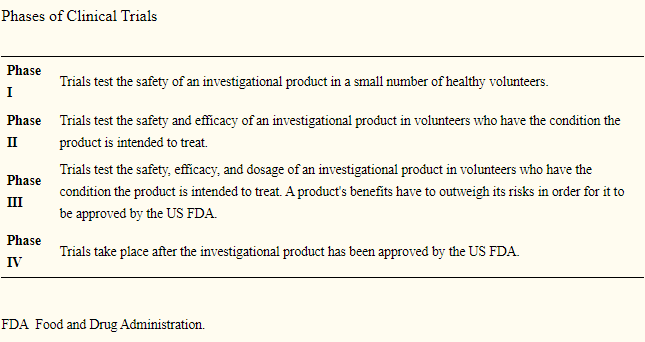
[source 2](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3061013/)